In [1]:
import stock
from stock_model import NigModel

In [2]:
spy_weekly = stock.import_spy_weekly()

In [3]:
# initial_model = NigModel(0.8, -0.1, 0.5, 1.9, spy_weekly)

initial_model = NigModel.from_stock_moments(spy_weekly)

model = initial_model.reoptimize(do_print=True)

rho is 60.8360321465797
      fun: 3026.5637087429395
 hess_inv: <4x4 LbfgsInvHessProduct with dtype=float64>
      jac: array([-9.09494702e-05, -1.00044417e-03, -4.54747351e-04, -3.63797881e-04])
  message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 90
      nit: 16
   status: 0
  success: True
        x: array([ 0.76368024, -0.14146089,  0.5418571 ,  1.93889247])


In [4]:
import math
print(initial_model.mean, initial_model.stddev, initial_model.skewness, initial_model.kurtosis)
print(initial_model.stock.summary)
print(f'variance: {initial_model.stock.summary.variance}')

print(initial_model.stddev / initial_model.stock.summary.stddev)
print(initial_model.skewness / initial_model.stock.summary.skewness)
print(math.sqrt(initial_model.kurtosis / initial_model.stock.summary.kurtosis))

0.025205047045198135 2.0728333654609323 -4.455780298634345 432.08438678814196
Mean: 0.02521. Standard deviation: 0.8732. Skewness: -1.877. Kurtosis: 79.14.
variance: 0.7624496520014723
2.3738802398884897
2.3738802398884893
2.3365785268250505


In [5]:
print(initial_model.alpha, model.alpha)
print(initial_model.beta, model.beta)
print(initial_model.mu, model.mu)
print(initial_model.delta, model.delta)

print(model.alpha**2 / model.beta**2, initial_model.alpha**2 / initial_model.beta**2)

print(initial_model.scipy_stats())
print(model.scipy_stats())

0.042339989760555856 0.7636802384318673
-0.005428380831979912 -0.1414608898752415
0.04814544755067564 0.27946732905958394
0.17745260909512603 3.7593040295970193
29.144078886006167 60.836032146579704
(array(-0.03417643), array(4.29663816), array(-1.87700299), array(76.14214396))
(array(0.17637997), array(5.18729371), array(-0.64147707), array(4.54618358))


<Figure size 432x288 with 0 Axes>

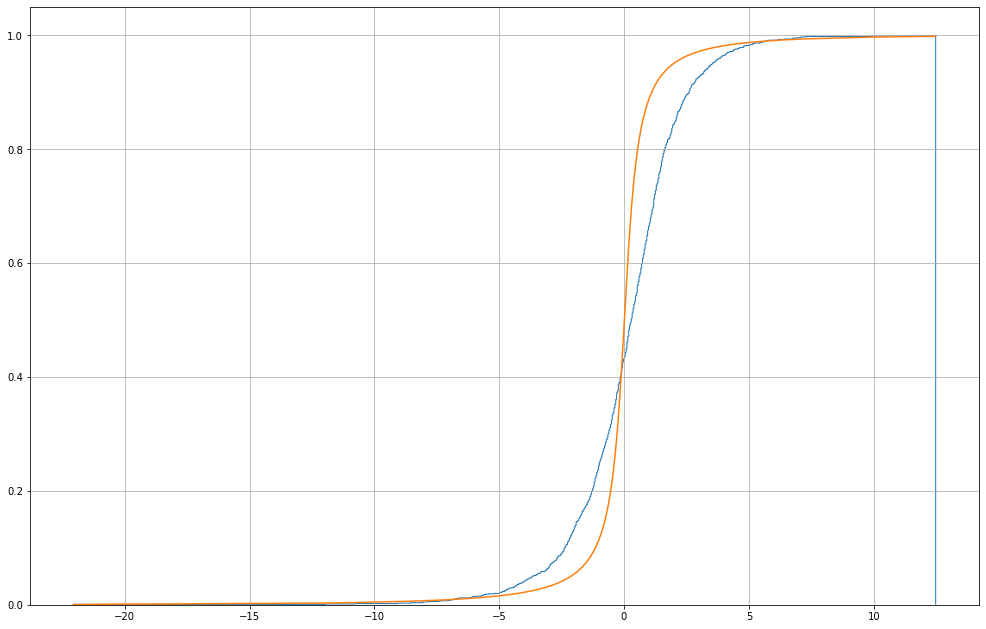

In [6]:
initial_model.plot_comparison()

<Figure size 432x288 with 0 Axes>

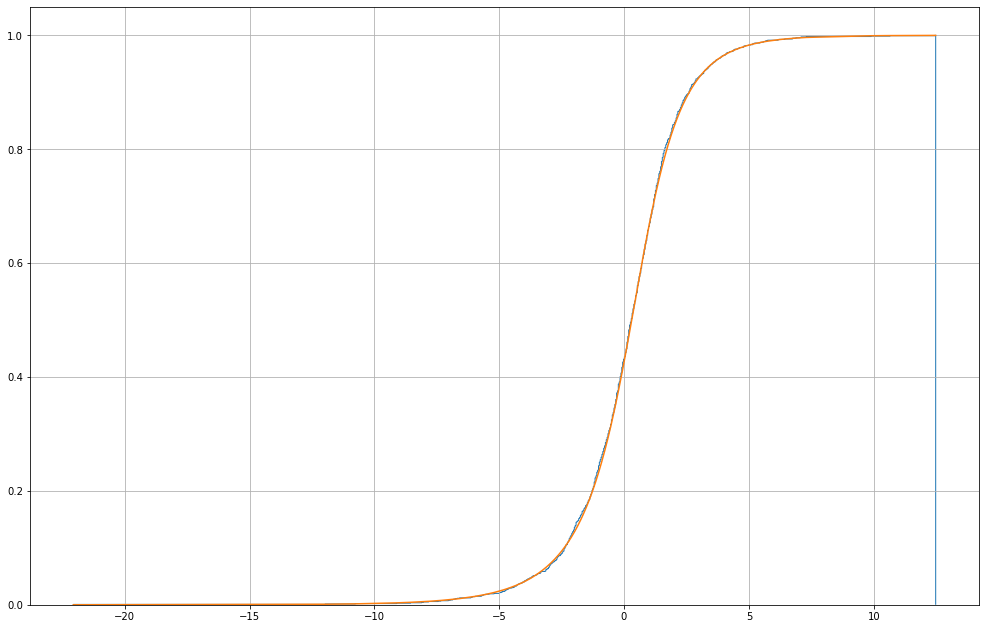

In [7]:
model.plot_comparison()